### Importing Necessary Libraris

In [6]:
import os
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2
from skimage.feature import hog
from skimage.feature import local_binary_pattern


### Loading Images of `Normal` and `Eye-Disease`

In [2]:
train_data = 'Splited_Dataset/train'
test_data = 'Splited_Dataset/test'

### Image Preprocessing

In [3]:
## Image preprocessing------------------
data_dir = 'Splited_Dataset/train'

img_size = (100, 100)

preprocessed_folder_path = 'train_preprocessed_data'

if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
            normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


# Images Before Preprocessing

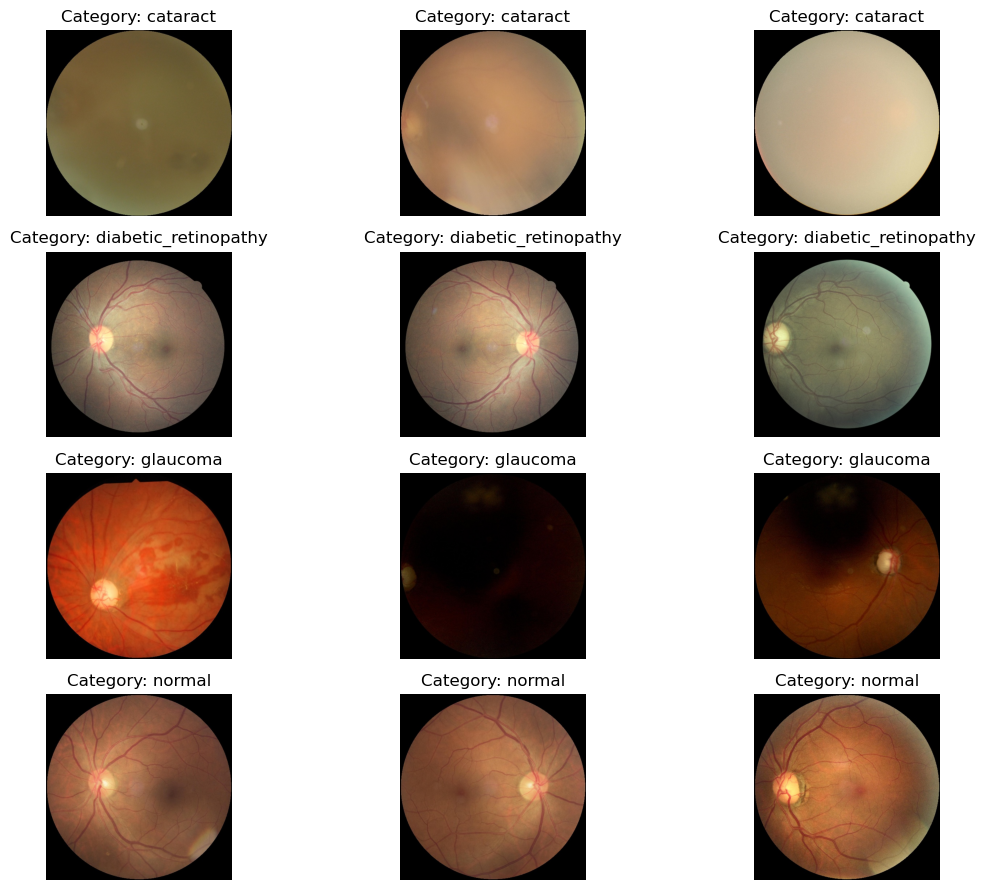

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_folder_path = 'Splited_Dataset/train'

# Define the number of images to display from each category
num_images_per_category = 3

# Create a figure for subplots
fig, axes = plt.subplots(len(os.listdir(dataset_folder_path)), num_images_per_category, figsize=(12, 9))

# Loop through each category folder
for i, folder in enumerate(os.listdir(dataset_folder_path)):
    folder_path = os.path.join(dataset_folder_path, folder)
    images = os.listdir(folder_path)
    
    # Select three images randomly from the category
    selected_images = images[:num_images_per_category]
    
    # Create subplots for the selected images
    for j, image_filename in enumerate(selected_images):
        image_path = os.path.join(folder_path, image_filename)
        original_image = cv2.imread(image_path)  # Read the original image
        
        # Plot the image
        axes[i, j].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
        axes[i, j].set_title(f'Category: {folder}')
        axes[i, j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Images after preprocessing

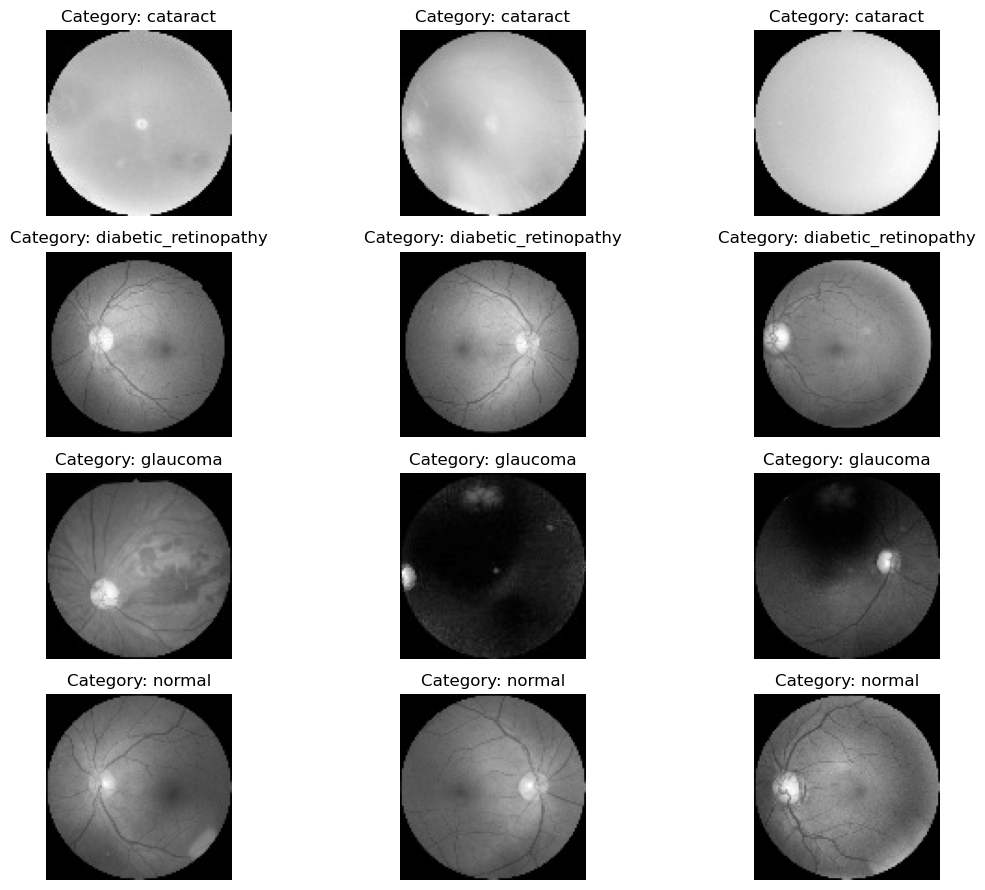

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

preprocessed_folder_path = 'train_preprocessed_data'

# Define the number of images to display from each category
num_images_per_category = 3

# Create a figure for subplots
fig, axes = plt.subplots(len(os.listdir(preprocessed_folder_path)), num_images_per_category, figsize=(12, 9))

# Loop through each category folder
for i, folder in enumerate(os.listdir(preprocessed_folder_path)):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    images = os.listdir(folder_path)
    
    # Select three images randomly from the category
    selected_images = images[:num_images_per_category]
    
    # Create subplots for the selected images
    for j, image_filename in enumerate(selected_images):
        image_path = os.path.join(folder_path, image_filename)
        preprocessed_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        
        # Plot the image
        axes[i, j].imshow(preprocessed_image, cmap='gray')
        axes[i, j].set_title(f'Category: {folder}')
        axes[i, j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [7]:
## Image preprocessing------------------
data_dir = 'Splited_Dataset/test'

img_size = (100, 100)

preprocessed_folder_path = 'test_preprocessed_data'
 
if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
         #   normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


# Feature Extraction Method-1 <br>
## HOG-`Histogram Oriented Gradient`

In [14]:
import os
import numpy as np
from skimage import io
from skimage.feature import hog

# Define the path to the preprocessed image folder
preprocessed_folder_path = 'train_preprocessed_data'

# Parameters for the HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'

# Initialize lists to store features and labels
features = []
labels = []

# Define a dictionary to map class names to numeric labels
label_dict = {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

# Iterate through each folder representing a class
for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    # Get the numeric label for the current class
    label = label_dict[folder]
    
    # Iterate through each image in the current class folder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # Load the image using skimage
        image = io.imread(image_path)
        
        # Extract HOG features from the image
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        # Append the HOG features and corresponding label to the lists
        features.append(hog_features)
        labels.append(label)

# Convert the lists to NumPy arrays
features1 = np.array(features)
labels1 = np.array(labels)


In [9]:

test_folder_path = 'test_preprocessed_data'
test_features1 = []
test_labels1 = []

label_dict = {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

# Iterate through each folder representing a class
for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    # Get the numeric label for the current class
    label = label_dict[folder]
    
    # Iterate through each image in the current class folder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # Load the image using skimage
        image = io.imread(image_path)
        
        # Extract HOG features from the image
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        # Append the HOG features and corresponding label to the lists
        test_features1.append(hog_features)
        test_labels1.append(label)

# Convert the lists to NumPy arrays
test_features1 = np.array(test_features1)
test_labels1 = np.array(test_labels1)

In [4]:
from skimage import io
from skimage.feature import hog


# Parameters of HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'



label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}


val_folder_path = 'chest_xray/chest_xray/val/'
val_features = []
val_labels = []

for folder in os.listdir(val_folder_path):
    folder_path = os.path.join(val_folder_path, folder)
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = skimage.io.imread(image_path)
      
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        val_features.append(hog_features)
        val_labels.append(label)
        
val_features = np.array(val_features)
val_labels = np.array(val_labels)

C:\Users\HTCM\AppData\Local\Temp\ipykernel_3180\4273253906.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_features = np.array(val_features)


In [10]:
## data of first ten images
for i in range(5):
    print("image-{}".format(i+1))
    print("Label: ", labels[i])
    print("Features: ", features[i][:70])
    print("_"*70)


image-1
Label:  0
Features:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02429136 0.         0.         0.         0.
 0.00725968 0.00889126 0.08582537 0.         0.05361394 0.
 0.         0.         0.         0.01540011 0.         0.
 0.         0.         0.         0.         0.         0.
 0.09353375 0.02987795 0.33553995 0.0034658  0.07136869 0.02295712
 0.04384551 0.06735506 0.00738884 0.02879924 0.01713169 0.67096398
 0.14267111 0.03655468 0.00399067 0.01298321 0.00665341 0.00255094
 0.04635425 0.         0.07113005 0.         0.01402463 0.
 0.         0.         0.         0.09170762 0.24737217 0.54979607
 0.00418416 0.01920478 0.00609039 0.00315153]
______________________________________________________________________
image-2
Label:  0
Features:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01288896 0. 

# Feature Extraction Method-2 <br>
## LBP- `Local Binary Pattern`

In [11]:

from skimage import io
from skimage.feature import local_binary_pattern

preprocessed_folder_path = 'train_preprocessed_data'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

features2 = []
labels2 = []

label_dict = {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        features2.append(lbp_features)
        labels2.append(label)
        
features2 = np.array(features2)
labels2 = np.array(labels2)


In [12]:
preprocessed_folder_path = 'test_preprocessed_data'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

test_features2 = []
test_labels2 = []

label_dict = {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        test_features2.append(lbp_features)
        test_labels2.append(label)
        
test_features2 = np.array(test_features2)
test_labels2 = np.array(test_labels2)


In [6]:
preprocessed_folder_path = 'chest_xray/chest_xray/val/'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

val_features2 = []
val_labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        val_features2.append(lbp_features)
        val_labels2.append(label)
        
val_features2 = np.array(val_features2)
val_labels2 = np.array(val_labels2)


In [13]:
## data of first three images
for i in range(3):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[2])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.0152 0.01   0.0066 0.0049 0.0053 0.0108 0.0099 0.0141 0.0244 0.0314
 0.0403 0.0629 0.0564 0.0618 0.0493 0.0299 0.018  0.0124 0.0102 0.0081
 0.0052 0.0066 0.006  0.0047 0.1877 0.3079]
-----------------------------
image-2
Label:  0
Features:  [0.0152 0.01   0.0066 0.0049 0.0053 0.0108 0.0099 0.0141 0.0244 0.0314
 0.0403 0.0629 0.0564 0.0618 0.0493 0.0299 0.018  0.0124 0.0102 0.0081
 0.0052 0.0066 0.006  0.0047 0.1877 0.3079]
-----------------------------
image-3
Label:  0
Features:  [0.0152 0.01   0.0066 0.0049 0.0053 0.0108 0.0099 0.0141 0.0244 0.0314
 0.0403 0.0629 0.0564 0.0618 0.0493 0.0299 0.018  0.0124 0.0102 0.0081
 0.0052 0.0066 0.006  0.0047 0.1877 0.3079]
-----------------------------


In [15]:
import numpy as np

# Save the features and labels to disk
np.save('features1.npy', features1)
np.save('labels1.npy', labels1)



In [16]:
import numpy as np

# Save the features and labels to disk
np.save('features2.npy', features2)
np.save('labels2.npy', labels2)



In [17]:
import numpy as np

# Save the features and labels to disk
np.save('test_features1.npy', test_features1)
np.save('test_labels1.npy', test_labels1)

# Load the features and labels from disk


In [18]:
import numpy as np

# Save the features and labels to disk
np.save('test_features2.npy', test_features2)
np.save('test_labels2.npy', test_labels2)

